In [1]:
#import libraries for reading dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in DataFrame
df_cleaned = pd.read_csv('df_cleaned.csv')
df_cleaned.head()

type category vacancy_type  vacancy           lastupdate  \
0    P   HOURLY            A      129  2021-03-09 08:57:03   
1    P   HOURLY            A      122  2021-03-09 09:11:03   
2    P   HOURLY            A      115  2021-03-09 09:27:03   
3    P   HOURLY            A      116  2021-03-09 09:41:03   
4    P   HOURLY            A      111  2021-03-09 09:57:03   

                 time of api  weekday  hour  month  minute  
0  2021-03-09 09:00:00+00:00        1     9      3       0  
1  2021-03-09 09:15:00+00:00        1     9      3      15  
2  2021-03-09 09:30:00+00:00        1     9      3      30  
3  2021-03-09 09:45:00+00:00        1     9      3      45  
4  2021-03-09 10:00:00+00:00        1    10      3       0

In [6]:
#EDA shows these 2 factors seem to be most explanatory
X = df_cleaned[['weekday','hour']]
y = df_cleaned['vacancy']

10% of mean:8.350478650660994
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


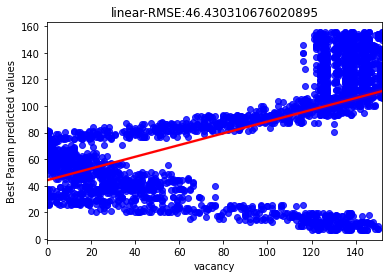

10% of mean:8.350478650660994
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


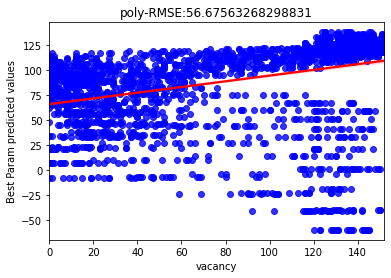

10% of mean:8.350478650660994
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


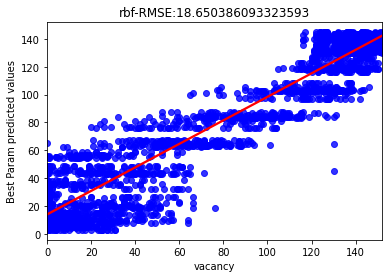

10% of mean:8.350478650660994
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


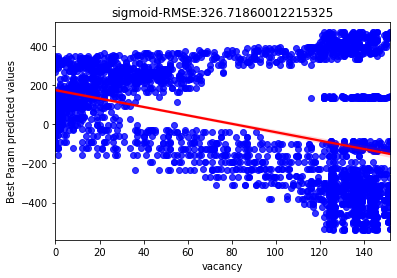

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernel:
    svr = SVR(kernel=k)


    svr.fit(X_train,y_train)
    y_pred = svr.predict(X_test)

    print(f'10% of mean:{0.1*y_train.mean()}')
    plt.xlabel('Actual Values')
    plt.ylabel('Best Param predicted values')
    plt.title(f'{k}-RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
    sns.regplot(y_test,y_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.show()

#rbf seems to perform the best

In [8]:
#Given rbf, what hyperparameters make it perform better?

from sklearn.model_selection import GridSearchCV
params ={

    'kernel':['rbf'],
    'C':[0.01,0.1,1,10,100],
    'gamma':[0.01,0.1,1,10,100],
    'epsilon':[0,0.5,2,5,10]

}
#scoring: ‘neg_root_mean_squared_error’
#cv = 5
#n_jobs = -1 (use all processor)

gs_cv = GridSearchCV(estimator=SVR(),param_grid=params,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=5)

gs_cv

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0, 0.5, 2, 5, 10],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='neg_root_mean_squared_error', verbose=5)

In [11]:
#fitting gridsearchCV
gs_cv.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0, 0.5, 2, 5, 10],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='neg_root_mean_squared_error', verbose=5)

In [12]:
#best parameters
gs_cv.best_params_

{'C': 100, 'epsilon': 5, 'gamma': 0.1, 'kernel': 'rbf'}

In [13]:
#RMSE of best parameters
print(f'Best RMSE: {-gs_cv.best_score_}')
print(f'Range of y values: {y_train.min()},{y_train.max()}')
print(f'10% of mean of y values:{0.1 * y_train.mean()}.')

Best RMSE: 12.289104634233755
Range of y values: 0,152
10% of mean of y values:8.350478650660994.


<AxesSubplot:title={'center':'RMSE: 12.289104634233755'}, xlabel='vacancy', ylabel='Best Param predicted values'>

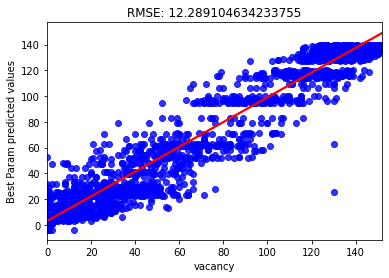

In [14]:
#best param model fitted and predicted
best_param_svr = SVR(C= 100, epsilon=5, gamma=0.1, kernel='rbf')
best_param_svr.fit(X_train,y_train)
y_svr_bp = best_param_svr.predict(X_test)
plt.xlabel('Actual Values')
plt.ylabel('Best Param predicted values')
plt.title((f'RMSE: {-gs_cv.best_score_}'))
sns.regplot(x=y_test,y=y_svr_bp,
scatter_kws={"color": "blue"}, line_kws={"color": "red"})


<AxesSubplot:title={'center':'RMSE: 12.360294506472318'}, xlabel='vacancy', ylabel='Best Param predicted values'>

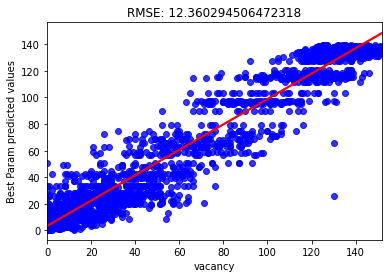

In [15]:
#random forest classifier

from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

plt.xlabel('Actual Values')
plt.ylabel('Best Param predicted values')
plt.title((f'RMSE: {np.sqrt(mean_squared_error(y_test,rfr_pred))}'))
sns.regplot(x=y_test,y=rfr_pred,
scatter_kws={"color": "blue"}, line_kws={"color": "red"})





In [16]:
params_rfr ={

    'n_estimators': [200,400,600,800],
    'criterion': ['mse','mae'],
    'max_depth': [10,20,40,80],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

rfr_tune = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_rfr,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=5)


In [17]:
rfr_tune.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 40, 80],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800]},
             scoring='neg_root_mean_squared_error', verbose=5)

In [18]:
rfr_tune.best_params_

#{'criterion': 'mse',
# 'max_depth': 10,
# 'min_samples_leaf': 4,
# 'min_samples_split': 10,
# 'n_estimators': 200}

{'criterion': 'mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [19]:
rfr_tune.best_score_

-12.18997938266327

In [20]:
y_rfr_tune = rfr_tune.predict(X_test)

<AxesSubplot:title={'center':'RMSE: 12.354137434523661'}, xlabel='vacancy', ylabel='Best Param predicted values'>

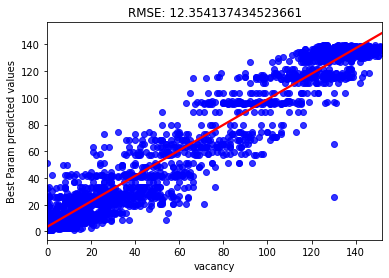

In [21]:
plt.xlabel('Actual Values')
plt.ylabel('Best Param predicted values')
plt.title((f'RMSE: {np.sqrt(mean_squared_error(y_test,y_rfr_tune))}'))
sns.regplot(x=y_test,y=y_rfr_tune,
scatter_kws={"color": "blue"}, line_kws={"color": "red"})

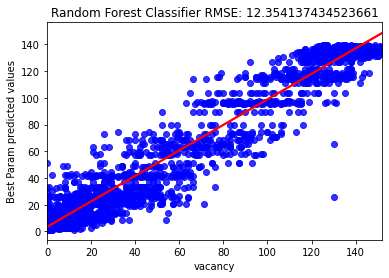

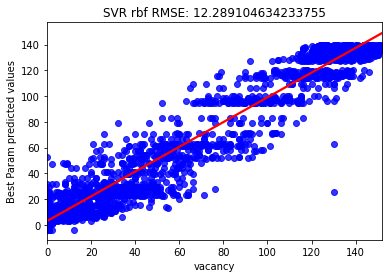

In [23]:
plt.xlabel('Actual Values')
plt.ylabel('Best Param predicted values')
plt.title((f'Random Forest Classifier RMSE: {np.sqrt(mean_squared_error(y_test,y_rfr_tune))}'))
sns.regplot(x=y_test,y=y_rfr_tune,
scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

best_param_svr = SVR(C= 100, epsilon=5, gamma=0.1, kernel='rbf')
best_param_svr.fit(X_train,y_train)
y_svr_bp = best_param_svr.predict(X_test)
plt.xlabel('Actual Values')
plt.ylabel('Best Param predicted values')
plt.title((f'SVR rbf RMSE: {-gs_cv.best_score_}'))
sns.regplot(x=y_test,y=y_svr_bp,
scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

#SVR rbf kernel -> overall better



In [24]:
X_test #looking at dataframe structure for prediction model

#dataframe with columns = [weekday, hour] (extracted from datetime)

weekday  hour
6968        5    14
567         0     7
9387        3     6
3410        2    13
2882        3    23
...       ...   ...
1808        6    11
414         5    17
1340        1    11
4450        6    16
4062        2    13

[2821 rows x 2 columns]

In [47]:
#function for use input
#'%Y-%m-%dT%H:%M:%SZ' full datetime

from datetime import datetime

def user_prediction(date_string):
    #date_string = str(input('Enter date(yyyy-mm-dd hh:mm): '))
    date_datetime = datetime.strptime(date_string, "%Y-%m-%d %H:%M")

    #extracting datetime variables for prediction model
    input_dict = {}
    input_dict['weekday'] = date_datetime.weekday() 
    input_dict['hour'] = date_datetime.hour

    for_pred = pd.DataFrame(input_dict,index=[0])

    return print(f'On {date_string}, the amount of vacany predicted in Lee Garden One Park is {int(best_param_svr.predict(for_pred)[0])}')


 

In [48]:
#formalizing function
date_string = str(input('Enter date(yyyy-mm-dd hh:mm): '))
user_prediction(date_string)

On 2021-06-15 09:15, the amount of vacany predicted in Lee Garden One Park is 115
